In [2]:
import pandas as pd
import glob
import os
import pdb
# use your path
all_files = glob.glob('/home/p/pbryant/pfs/results/CATH/20190606/*/*.tsv')     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = [pd.read_csv(f, sep='\t') for f in all_files]
for dataframe, filename in zip(df_from_each_file, all_files):
    hgroup = filename.split('/')[-2]
    dataframe['H_group'] = filename.split('/')[-2]
    dataframe['C.'] = hgroup.split('.')[0]+'.'
    dataframe['C.A.'] = hgroup.split('.')[0]+'.'+hgroup.split('.')[1]
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


In [21]:
print(concatenated_df.head())
len(concatenated_df.index)

      uid1     uid2  MLAAdist   RMSD  TMscore_high  TMscore_low      H_group  \
0  2rc3C00  5k24C00   2.86903   5.42       0.45996      0.44367  3.10.580.10   
1  3lhhA01  4fryB00   2.50084  17.73       0.14773      0.12625  3.10.580.10   
2  3l2bA01  2yzqA01   2.22324  14.74       0.18002      0.16634  3.10.580.10   
3  3lhhA01  3oi8A01   1.49612  15.13       0.11439      0.10694  3.10.580.10   
4  5k24C00  2yzqA01   2.84098  16.28       0.17813      0.15180  3.10.580.10   

   C.  C.A.  
0  3.  3.10  
1  3.  3.10  
2  3.  3.10  
3  3.  3.10  
4  3.  3.10  


35422

In [61]:
#Filter: concatenated_df[concatenated_df['MLAAdist']<6]
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
#Calculate line of best fit
ML_dists = concatenated_df['MLAAdist']
rmsd_dists = concatenated_df['RMSD']
(slope, intercept, r_value, p_value, std_err) = stats.linregress(ML_dists, rmsd_dists)
print('Slope: ', slope)
print('Intercept: ', intercept)

#Get deviations from line of best fit
deviations = [] #Save deviations
for i in range(0, len(ML_dists)):
    deviation = rmsd_dists[i]-(intercept+slope*ML_dists[i])
    deviations.append(deviation)

#concatenated_df['deviation'] = deviations
#Plot RMSD and ML_dist
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
g = sns.jointplot(x="MLAAdist", y="RMSD", data=concatenated_df, kind = "hex")
sns.regplot(x="MLAAdist", y="RMSD", data=concatenated_df, ax=g.ax_joint, scatter=False)
g = sns.jointplot(x="MLAAdist", y="RMSD", data=below_6, kind = "hex")
sns.regplot(x="MLAAdist", y="RMSD", data=below_6, ax=g.ax_joint, scatter=False)

Slope:  1.48013302585
Intercept:  7.14239420257


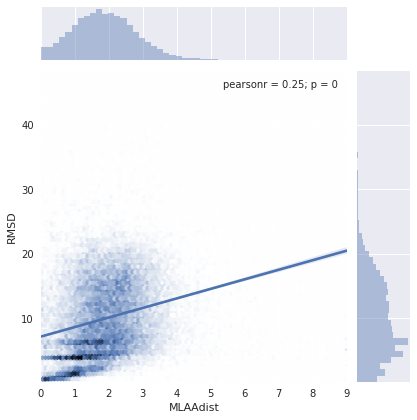

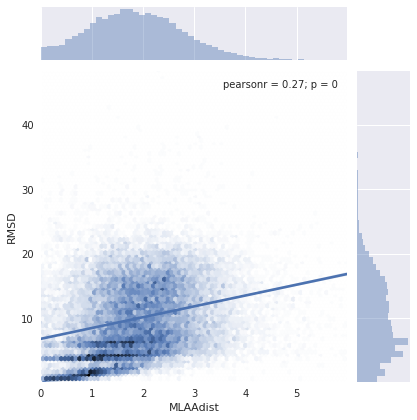

In [62]:
plt.show()

In [8]:
print(max(ML_dists), max(rmsd_dists))


8.99909 48.31


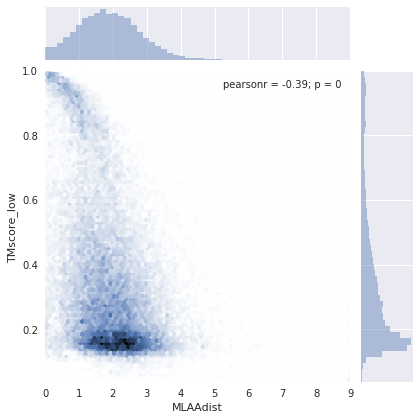

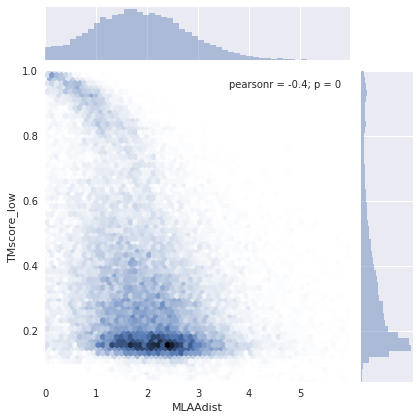

In [36]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
g = sns.jointplot(x="MLAAdist", y="TMscore_low", data=concatenated_df, kind = "hex")
#g.ax_joint.set_yscale('log')
#sns.regplot(x="MLAAdist", y="TMscore_low", data=concatenated_df, ax=g.ax_joint, scatter=False)
g = sns.jointplot(x="MLAAdist", y="TMscore_low", data=below_6, kind = "hex")
#sns.regplot(x="MLAAdist", y="TMscore_low", data=below_6, ax=g.ax_joint, scatter=False, order = 3)
plt.show()

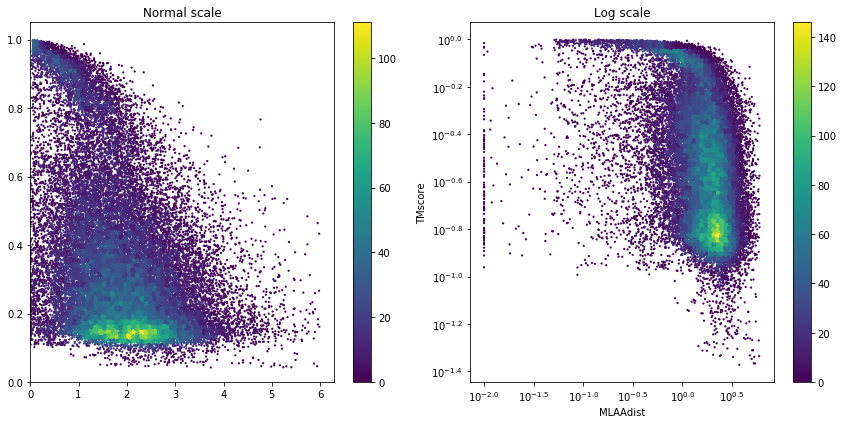

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pdb
complete_df = pd.read_csv('/home/p/pbryant/pfs/evolution/visual/complete_df.csv')
#g = sns.JointGrid(x="MLAAdist", y="TMscore_low", data=below_6, xlim=[0,6],ylim=[0.01,1])
#g.ax_marg_x.hist(below_6["MLAAdist"], bins=np.logspace(0,np.log(6),6))
#g.ax_marg_y.hist(below_6["TMscore_low"], bins=np.logspace(0,np.log(1),1), orientation="horizontal")
below_6 = complete_df[complete_df['MLAAdist']<6]
x = np.asarray(below_6["MLAAdist"])
y = np.asarray(below_6["TMscore_low"])
x = np.clip(x, 0.01, 6)


# INIT FIGURE #################################################################

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# AX1 #########################################################################

xbins = np.linspace(x.min(), x.max(), 70)
ybins = np.linspace(y.min(), y.max(), 70)

hist, xedges, yedges = np.histogram2d(x, y bins=(xbins, ybins))

# See http://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

sc = ax1.scatter(x, y,
                 c=c,
                 s=5,
                 marker='o',
                 #cmap='gnuplot2',
                 linewidth=0,
                 alpha=1)
fig.colorbar(sc, ax=ax1)

ax1.set_xlim(xmin=0)
ax1.set_ylim(ymin=0)
ax1.set_title("Normal scale")

# AX2 #########################################################################

x = np.log10(x)
y = np.log10(y)

xbins = np.linspace(x.min(), x.max(), 70)
ybins = np.linspace(y.min(), y.max(), 70)

hist, xedges, yedges = np.histogram2d(x, y, bins=(xbins, ybins))

# See http://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

sc = ax2.scatter(x, y,
                 c=c,
                 s=5,
                 marker='o',
                 #cmap='gnuplot2',
                 linewidth=0,
                 alpha=1)
fig.colorbar(sc, ax=ax2)

# Use "10^n" instead "n" as ticks label
func_formatter = lambda x, pos: r'$10^{{{}}}$'.format(round(float(x), 2))
ax2.xaxis.set_major_formatter(FuncFormatter(func_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(func_formatter))

ax2.set_title("Log scale")
plt.xlabel("MLAAdist", axes = ax2)
plt.ylabel("TMscore", axes = ax2)


# SHOW AND SAVE FILE ##########################################################

plt.tight_layout()

#plt.savefig("hist2d_scatter_plot_logscale_xy.png")
plt.show()

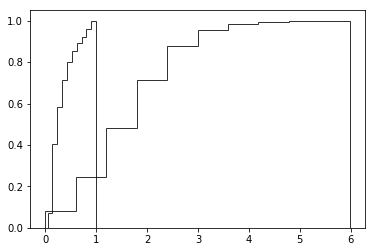

In [53]:
x = np.asarray(below_6["MLAAdist"])
y = np.asarray(below_6["TMscore_low"])
plt.hist(x, normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.hist(y, normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.show()

In [54]:
complete_df.index

RangeIndex(start=0, stop=35309, step=1)

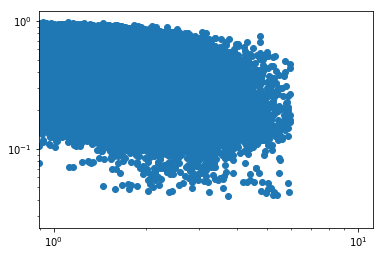

In [25]:
plt.scatter(x,y)
plt.xscale("log") 
plt.yscale("log") 
plt.show()

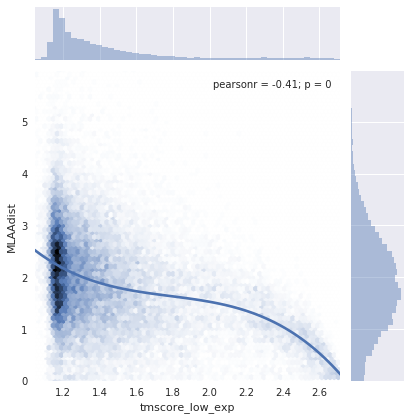

In [38]:
df = pd.DataFrame(list(zip(x, y)), 
               columns =['MLAAdist', 'tmscore_low_exp']) 
g = sns.jointplot(x="tmscore_low_exp", y="MLAAdist", data=df, kind = "hex")
sns.regplot(x="tmscore_low_exp", y="MLAAdist", data=df, ax=g.ax_joint, scatter=False, order = 3)
plt.show()

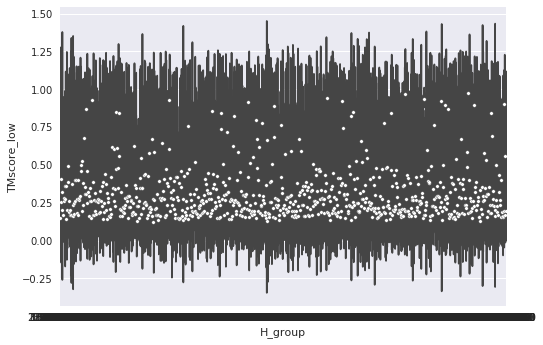

In [68]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
sns.violinplot(x = "H_group", y = "TMscore_low", data = below_6)
plt.show()

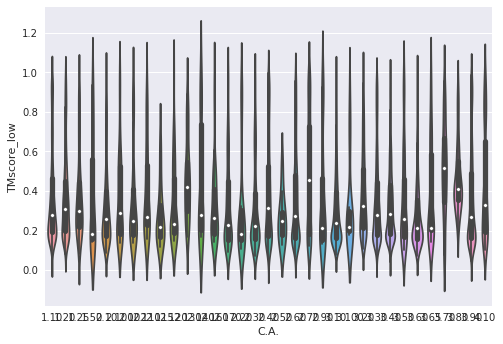

In [71]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
sns.violinplot(x = "C.A.", y = "TMscore_low", data = below_6)
plt.show()

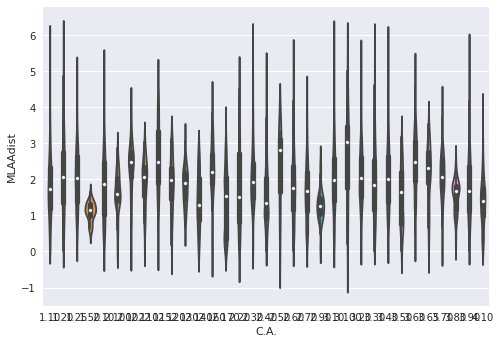

In [73]:
sns.violinplot(x = "C.A.", y = "MLAAdist", data = below_6)
plt.show()

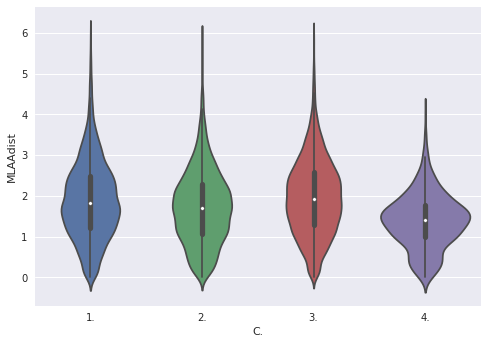

In [68]:
sns.violinplot(x = "C.", y = "MLAAdist", data = below_6)
plt.show()

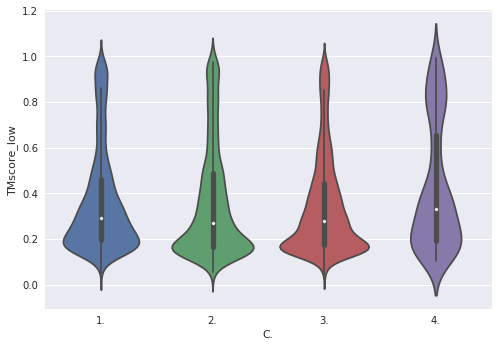

In [69]:
sns.violinplot(x = "C.", y = "TMscore_low", data = below_6)
plt.show()

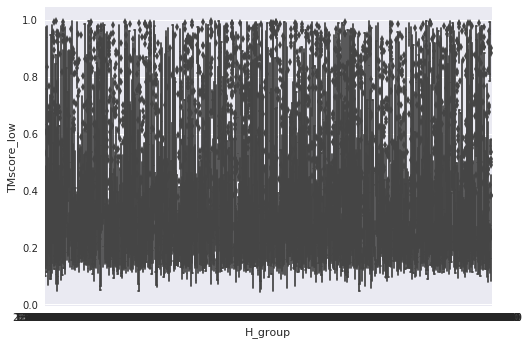

In [40]:
plt.show()
#Boxplot

In [1]:
#Looking into identities
import pandas as pd
import glob
import pdb
from encode import get_encodings
# use your path
all_files = glob.glob('/home/p/pbryant/pfs/results/CATH/20190606/*/*.aln')     # advisable to use os.path.join as this makes concatenation OS independent



In [2]:
uid1 = []
uid2 = []
encodings = []
aln_lens = []
identities = []

i = 0
for name in all_files:
    i+=1
    print(i)
    uids = name.split('/')[-1].split('.')[0].split('_')
    
    #Get encoding
    enc1, enc2, aln_len, identity = get_encodings(name)
    
    uid1.append(uids[0])
    uid2.append(uids[1])
    aln_lens.append(aln_len)
    identities.append(identity)
    encodings.append([enc1, enc2])
    



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201


3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982


5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719


7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497


8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186


10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
1069

11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
1206

13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
1343

14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
1479

15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
1616

17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
17494
17495
17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
1753

18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
1890

20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
2026

21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
2164

22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
2301

24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
2438

25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
2575

26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
2713

28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
2850

29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
2987

31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31236
31237
31238
31239
31240
31241
31242
31243
31244
31245
31246
31247
31248
31249
31250
31251
3125

32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
3261

33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
3398

35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
3535

36562
36563
36564
36565
36566
36567
36568
36569
36570
36571
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
3672

In [5]:
encoding_df = pd.DataFrame(list(zip(uid1, uid2, aln_lens, identities, encodings)), columns = ['uid1','uid2','aln_len','identity','encoding'])


In [50]:
below_6 = concatenated_df[concatenated_df['MLAAdist']<6]
complete_df = pd.merge(below_6, encoding_df, on=['uid1', 'uid2'], how='left')
complete_df.head()

,uid1,uid2,MLAAdist,RMSD,TMscore_high,TMscore_low,H_group,C.,C.A.,aln_len,identity,encoding
0,2rc3C00,5k24C00,2.86903,5.42,0.45996,0.44367,3.10.580.10,3.,3.10,126,0.13,"[[13, 6, 7, 8, 12, 11, 16, 19, 11, 8, 10, 10, ..."
1,3lhhA01,4fryB00,2.50084,17.73,0.14773,0.12625,3.10.580.10,3.,3.10,102,0.17,"[[19, 14, 1, 15, 3, 9, 19, 13, 10, 3, 10, 2, 1..."
2,3l2bA01,2yzqA01,2.22324,14.74,0.18002,0.16634,3.10.580.10,3.,3.10,119,0.18,"[[10, 11, 19, 5, 3, 10, 5, 12, 3, 11, 9, 0, 14..."
3,3lhhA01,3oi8A01,1.49612,15.13,0.11439,0.10694,3.10.580.10,3.,3.10,69,0.33,"[[19, 3, 3, 20, 19, 7, 9, 9, 15, 0, 11, 6, 10,..."
4,5k24C00,2yzqA01,2.84098,16.28,0.17813,0.15180,3.10.580.10,3.,3.10,120,0.14,"[[1, 16, 19, 5, 3, 19, 10, 16, 14, 10, 5, 3, 4..."


mean aln_len: 145.515137784
mean identity: 0.308144382452


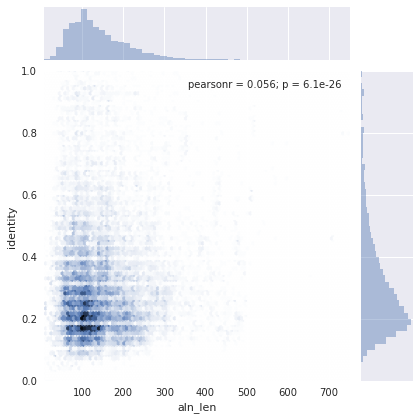

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.jointplot(x="aln_len", y="identity", data=complete_df, kind = "hex")
print('mean aln_len: '+str(sum(complete_df["aln_len"])/len(complete_df["aln_len"])))
print('mean identity: '+str(sum(complete_df["identity"])/len(complete_df["identity"])))
plt.show()

In [49]:
complete_df.to_csv('complete_df.csv',index=False)
#Written to csv

In [1]:
#Functions
def read_tsv(H_groups_file):
	'''Read ids and H-groups into dict
	'''

	H_groups = {} #Store H-groups and uids

	with open(H_groups_file) as file:
		for line in file:
			line = line.rstrip() #remove \n
			line = line.split(',')
			uid = line[0]
			H_group = line[1:]
			H_group = H_group[0]+'.'+H_group[1]+'.'+H_group[2]+'.'+H_group[3]
			H_groups[uid] = H_group


	return H_groups

def read_fasta(fasta_file):
	'''Read fasta file into dict
	'''

	sequences = {} #Store sequences

	with open(fasta_file) as file:
		for line in file:
			line = line.rstrip() #remove \n
			if line[0] == '>':
				uid = line.split('|')[2].split('/')[0]
			else:
				sequences[uid] = line

	return sequences


def get_groups(H_groups, sequences):
	'''Get H-group for each uid and group sequences accordingly
	'''


	grouped_sequences = {} #Sequences grouped by H-group

	for key in sequences:
		H_group = H_groups[key]
		sequence = sequences[key]

		if H_group not in grouped_sequences.keys(): #If not in new dict - add
			grouped_sequences[H_group] = [key + '/' + sequence]
		else:
			grouped_sequences[H_group].append(key + '/' + sequence) #Otherwise append

	return grouped_sequences



H_groups = read_tsv('/home/pbryant/data/CATH/h_grouped/H_group.tsv')
sequences = read_fasta('/home/pbryant/data/CATH/reallybelow95.fa')
grouped_sequences = get_groups(H_groups, sequences)

In [66]:
grouped_sequences['3.30.930.10']

['12asA00/MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAVRESVPSLL',
 '1atiB01/AASSLDELVALCKRRGFIFQSSEIYGGLQGVYDYGPLGVELKNNLKQAWWRRNVYERDDMEGLDASVLTHRLVLHYSGHEATFADPMVDWTPPRYFNMMFQDLRGPRGGRGLLAYLRPETAQGIFVNFKNVLDATSRKLGFGIAQIGKAFRNEITPRNFIFRVREFEQMEIEYFVRPGEDEYWHRYWVEERLKWWQEMGLSRENLVPYQQPPESSAHYAKATVDILYRFPHGSLELEGIAQRTDFDLGSHTKDQEALGITARVLRNEHSTQRLAYRDPETGKWFVPYVIEPSAGVDRGVLALLAE',
 '1b7yB05/EAPYRKEQRLREVLSGLGFQEVYTYSFMDPEDARRFRLDPPRLLLLNPLAPEKAALRTHLFPGLVRVLKENLDLDRPERALLFEVGRVFREREETHLAGLLFGEGVGLPWAKERLSGYFLLKGYLEALFARLGLAFRVEAQAFPFLHPGVSGRVLVEGEEVGFLGALHPEIAQELELPPVHLFELRLPLPD',
 '1bbwA02/DKFHGLQDQEARYRQRYLDLISNDESRNTFKVRSQILSGIRQFMVNRGFMEVETPMMQVIPGGAAARPFITHHNALDLDMYLRIAPELYLKRLVVGGFERVFEINRNFRNEGISVRHNPEFTMME

In [46]:
num_entries = []
over_x = []
x = 2
for key in grouped_sequences:
    num_entries.append(len(grouped_sequences[key]))
    if len(grouped_sequences[key]) >= x:
        over_x.append(len(grouped_sequences[key]))

In [67]:
over_x

[116,
 3836,
 63,
 135,
 17,
 38,
 6,
 40,
 94,
 276,
 564,
 664,
 53,
 23,
 60,
 22,
 3,
 17,
 364,
 31,
 407,
 19,
 655,
 3,
 3,
 175,
 187,
 79,
 11,
 72,
 3,
 74,
 74,
 8,
 22,
 4,
 12,
 115,
 11,
 17,
 64,
 14,
 18,
 50,
 19,
 189,
 57,
 1307,
 92,
 92,
 64,
 21,
 21,
 247,
 1134,
 97,
 17,
 72,
 40,
 160,
 24,
 25,
 31,
 8,
 36,
 102,
 38,
 78,
 231,
 28,
 9,
 55,
 54,
 296,
 53,
 63,
 62,
 6,
 405,
 190,
 9,
 126,
 49,
 5,
 4,
 13,
 158,
 76,
 107,
 98,
 10,
 3,
 53,
 140,
 43,
 40,
 2,
 29,
 8,
 256,
 12,
 11,
 11,
 2,
 10,
 91,
 7,
 426,
 62,
 110,
 135,
 2,
 2,
 68,
 233,
 212,
 90,
 6,
 37,
 51,
 16,
 16,
 16,
 17,
 8,
 14,
 69,
 4,
 21,
 44,
 7,
 25,
 309,
 325,
 57,
 40,
 2,
 629,
 59,
 154,
 42,
 17,
 140,
 13,
 6,
 50,
 32,
 43,
 78,
 83,
 92,
 62,
 47,
 362,
 57,
 23,
 2,
 3,
 3,
 2,
 93,
 11,
 6,
 40,
 37,
 5,
 479,
 209,
 15,
 2,
 111,
 6,
 28,
 76,
 49,
 94,
 10,
 5,
 52,
 7,
 14,
 3,
 84,
 20,
 179,
 2,
 8,
 548,
 200,
 121,
 12,
 10,
 7,
 18,
 12,
 9,
 29,
 30,
 77

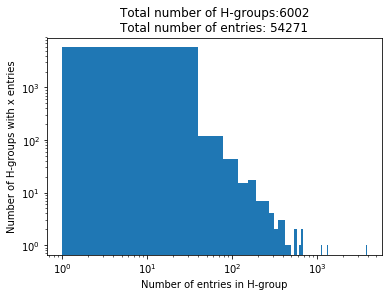

In [58]:
import matplotlib.pyplot as plt
plt.hist(num_entries, bins = 100)
plt.xlabel('Number of entries in H-group')
plt.ylabel('Number of H-groups with x entries')
average = sum(num_entries)/len(num_entries)
plt.title('Total number of H-groups:'+str(len(num_entries))+'\nTotal number of entries: '+str(sum(num_entries)))
plt.xscale('log')
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'At least 2 entries\nTotal number of entries: 51452\nTotal number of groups: 3183')

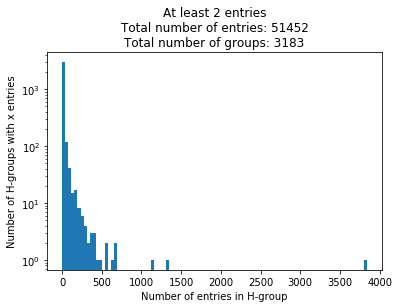

In [60]:
plt.hist(over_x, bins = 100, log = True)
plt.xlabel('Number of entries in H-group')
plt.ylabel('Number of H-groups with x entries')
average = sum(over_x)/len(over_x)
plt.title('At least 2 entries\n'+'Total number of entries: '+str(sum(over_x)) + '\n' +'Total number of groups: ' + str(len(over_x)))


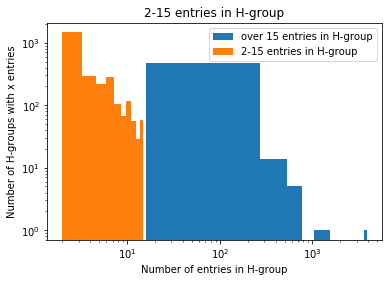

Number of entries in groups with over 2, but under 15 entries: 12032
Number of entries in groups with over 15 entries: 39420
Number of groups with under 15 entries: 2692
Number of groups with above 15 entries: 491


In [64]:
over_y = []
under_y = []
y = 15
for i in over_x:
    if i>y:
        over_y.append(i)
    else:
        under_y.append(i)
plt.hist(over_y, bins = 15, label = 'over 15 entries in H-group')
plt.hist(under_y, bins = 10, label = '2-15 entries in H-group')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of entries in H-group')
plt.ylabel('Number of H-groups with x entries')
plt.title('2-15 entries in H-group')
plt.show()
print('Number of entries in groups with over 2, but under 15 entries:',sum(under_y))
print('Number of entries in groups with over 15 entries:',sum(over_y))
print('Number of groups with under 15 entries:',len(under_y))
print('Number of groups with above 15 entries:',len(over_y))

(array([216., 169.,   0., 117., 103.,   0.,  67.,  69.,   0.,  48.,  55.,
          0.,  29.,  23.,  35.]),
 array([ 5.        ,  5.66666667,  6.33333333,  7.        ,  7.66666667,
         8.33333333,  9.        ,  9.66666667, 10.33333333, 11.        ,
        11.66666667, 12.33333333, 13.        , 13.66666667, 14.33333333,
        15.        ]),
 <a list of 15 Patch objects>)

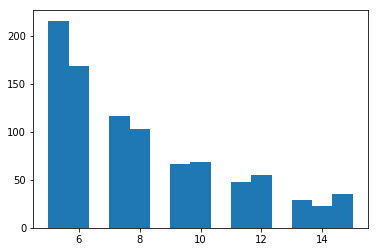

In [70]:
import pandas as pd
import glob
import pdb
# use your path
all_files = glob.glob('/home/p/pbryant/pfs/results/CATH/20190606/*/*.aln') 

37510

ML_dists: 13742
rmsd_dists 13742


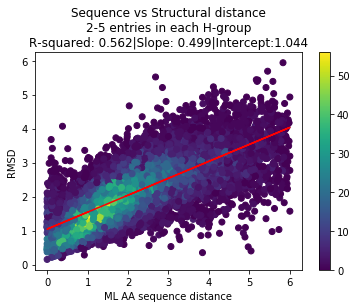

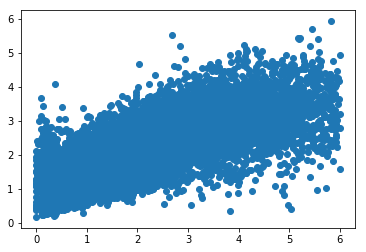

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from plot_dist import read_tsv
#Look here https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

dist_file = '/home/pbryant/results/CATH/20190430/all_dist_rmsd.tsv'
(ML_dists, rmsd_dists, Z) = read_tsv('/home/pbryant/results/CATH/20190430/all_dist_rmsd.tsv', 6)
print('ML_dists:',len(ML_dists))
print('rmsd_dists',len(rmsd_dists))

#100 since 2 decimals?
#E.g. 10*9 in z, means 90 bins --> can differ max 0.1 to be in the same bin (accuracy = 0.01)
xedges, yedges = np.linspace(0, 9, 10*9), np.linspace(0, 8, 10*8)
hist, xedges, yedges = np.histogram2d(ML_dists, rmsd_dists, (xedges, yedges))

xidx = np.clip(np.digitize(ML_dists, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(rmsd_dists, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]
plt.scatter(ML_dists, rmsd_dists, c=c)

#Calculate line of best fit
(slope, intercept, r_value, p_value, std_err) = stats.linregress(ML_dists, rmsd_dists)

#Desciption
plt.title('Sequence vs Structural distance' + '\n' + '2-5 entries in each H-group'+ '\n' +'R-squared: ' + str((r_value**2).round(3)) +'|' + 'Slope: ' + str(slope.round(3)) + '|Intercept:'+ str(intercept.round(3)))
plt.xlabel('ML AA sequence distance')
plt.ylabel('RMSD')
#Line of best fit
plt.plot(ML_dists, intercept + slope*np.array(ML_dists), 'r')
#Colorbar
plt.colorbar()

plt.show()

plt.scatter(ML_dists, rmsd_dists)

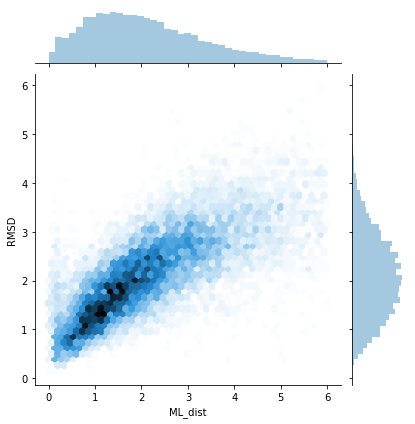

In [143]:
df = pd.DataFrame(list(zip(ML_dists, rmsd_dists)), 
               columns =['ML_dist', 'RMSD']) 

sns.jointplot(x="ML_dist", y="RMSD", data=df, kind = "hex")

In [16]:
#Get deviations from line of best fit
deviations = [] #Save deviations
for i in range(0, len(ML_dists)):
    deviation = rmsd_dists[i]-(intercept+slope*ML_dists[i])
    print(deviation)
    deviations.append(deviation)
    

-0.012221662034789915
0.4123035151444925
-0.05750655572722052
0.6826019752032293
-0.3978321485185695
-0.24723522840109613
0.08219498421404281
-0.26739802479677066
-0.26262865302397653
0.662574842470617
0.881950789620531
0.5127105061336792
1.0024934442727798
0.000518743959065926
-0.40321958397445634
-0.024250627813728443
0.754664062881774
0.23621062864068243
0.5399760893068168
0.20016601843510395
-0.11425062781372874
0.6458579031167213
1.8247183283469983
-0.639562654238772
-1.140940434435012
0.15940630192195604
-0.3749018133964275
-0.6541963623485039
0.32555944305798423
0.39875511633925775
-0.07465761880291533
-0.07612278636398662
-0.4396711851692219
0.8790807091306068
-0.4945490878724659
0.028782249071870103
-0.5654444680486759
-0.7488843359234614
0.8486194526761954
0.774148540962138
0.22292756799457858
-0.47674683921407235
-0.10059369807804419
-0.2712448836607424
0.05368728450772653
-1.0312660272263616
-0.08143481278902942
-0.1525412656591456
-0.06075649447371889
0.05222211694665524
0

-0.36230306023262737
-0.4681577413099187
-0.11322557314144976
-0.5470724320054214
0.018782249071870094
0.27880938180448256
0.07374154997295124
-0.126909635609747
0.06284616979674107
0.1374256124412485
0.13214071874881794
-0.23612278636398654
-0.10186893651082829
0.18742561244124856
-0.6476693521228951
-0.5982120067751436
-0.5609946999002373
-0.3771749737688781
-0.7026557857565887
-0.502547254826139
-0.01232420379824628
-0.7861227863639866
0.34878224907187017
-0.02701816654019651
0.6041485409621381
0.5103830802960032
0.3892977709915062
0.6543927355556498
0.7450167884057359
0.44087146948302713
0.3248268592774486
-0.12571579537479982
-0.5206750962758813
0.07951483285240579
-0.003035644013162919
0.039189240061056285
0.1188636472697071
-0.7732798386066747
-0.8875336884598328
-0.9274522902619955
-0.8377507503207322
-0.843035644013163
-0.7773980247967707
-0.8026557857565887
-0.7173708920641582
-0.7973708920641582
-0.1799425124953462
-0.2948475479312025
-0.24682823741190973
0.3493520364567311


-0.16254725482613908
-0.1278321485185696
-0.46365370769625525
0.08209244245058667
0.06509818660357292
0.09452839921871181
0.21428420462520004
-0.004196362348503513
-0.37810347584469384
0.5655865757905967
0.026454823234194347
0.4357493721862715
-0.9741692296158917
-0.8311634854629051
-0.5999696452279581
0.02916210732844382
-0.7148475479312024
-0.8601053088910204
-0.5002138398214697
-1.1843048932789535
-0.8655258662465131
-0.6364212464227235
-0.08644837915533565
0.114419868288262
0.24539664666230943
0.8638500809034011
1.0428461697967413
0.17379581543817624
-0.035254538920388434
0.4251524520687977
0.9686194526761955
-0.3962313172944363
-0.13552586624651308
0.1892435055262811
-0.027609097490676415
-0.5862584500270487
-0.15696390107497193
-0.17132628185857968
-0.026746839214072393
0.44157093136395686
0.8265030995324258
-0.05790755754941346
0.6588365145370949
0.7487279836066452
0.4529818334598035
0.24295470072719105
0.4491078418632193
0.45165232956179424
-0.0771266974706466
-0.29425062781372

0.46861945267619554
0.45474546107961134
-0.40289399118310687
-0.31907426505174774
-0.41836881400382486
0.03794113436088464
-0.211977467441278
-0.13821200677514356
0.15254770973800458
0.3279411343608847
-0.2382934049729809
0.00785973616304747
-0.2566111755510101
0.03279190433151635
0.028239594419621206
-0.047479422994608056
0.7194063019219561
0.85439273555565
-0.08652977735317302
-0.4781848740425312
-0.43753368845983287
-0.02677397194668485
-0.45257438755875157
-0.09192320197605297
-0.1618418037782159
-0.3582934049729809
-0.15677397194668474
-0.11652977735317305
-0.573117042211
-0.0723844584304647
-0.3273980247967707
-0.4172623611337085
-0.6021945293021775
0.007371346976023485
0.007615541569535367
-0.22257438755875159
-0.04186893651082846
-0.6923844584304646
0.16769693976737265
0.1425205770053921
0.31333455898376483
0.4475884088369231
0.58788686889566
0.6480225325587221
-0.03777788305334462
0.2778597361630475
0.49079007128518937
0.7342842046252
0.24211358601620558
0.7748268592774488
0.6

0.5135244881120518
-0.8006691071088876
0.6053152484644722
-0.6977990266189638
0.1911970622743766
-1.1525141329265334
0.31542377939492194
-0.6101053088910204
0.03515245206879758
-0.1599425124953462
0.007832603430435015
0.05726281604557393
0.18753414337169816
0.10796826709349716
0.22728994877818653
-0.09243872389568941
-0.19262865302397647
-0.012465856628301797
0.07265624066845433
-0.15214026383695267
0.1415437986313446
1.1182184508540023
0.3924663115401672
0.4825748424706169
0.9825477097380046
0.7922221169466555
1.0576426743021479
0.982716495300672
1.2678385925974283
0.3973170815107987
1.1680013889931025
0.4910885313439266
-0.10273718395442599
0.002194984214042961
-0.41818487404253113
0.5458307703841085
-0.3176422193902826
-0.22815774130991873
0.9952067175340225
0.9549896556731228
-0.1428185821522634
-0.1263127154922734
0.21823959441962115
-0.6758514590378621
0.15851691091273912
0.956129230442845
0.8551253193361856
0.4132048844876963
0.44678041602554375
0.8760206995123956
0.302852158963

13742 -3.1567679827796913 3.1400303547720414


(array([  1.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,   1.,   1.,   1.,
          0.,   2.,   1.,   1.,   3.,   2.,   3.,   2.,   5.,   5.,   5.,
         13.,   9.,  16.,  14.,  11.,  17.,  13.,  24.,  31.,  47.,  47.,
         62.,  73.,  94., 161., 229., 264., 296., 413., 454., 536., 514.,
        613., 589., 584., 655., 660., 625., 642., 601., 517., 585., 526.,
        452., 420., 434., 363., 323., 298., 206., 190., 169., 157., 137.,
        118.,  78.,  75.,  71.,  48.,  49.,  34.,  30.,  29.,  11.,  21.,
          9.,  13.,   6.,  11.,   5.,   1.,   2.,   2.,   1.,   2.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-3.15676798, -3.0938    , -3.03083202, -2.96786403, -2.90489605,
        -2.84192807, -2.77896008, -2.7159921 , -2.65302412, -2.59005613,
        -2.52708815, -2.46412017, -2.40115218, -2.3381842 , -2.27521622,
        -2.21224823, -2.14928025, -2.08631227, -2.02334428, -1.9603763 ,
        -1.89740832, -1.83

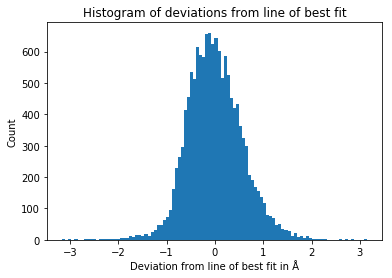

In [24]:
print(len(deviations), min(deviations),max(deviations))
plt.title('Histogram of deviations from line of best fit')
plt.xlabel('Deviation from line of best fit in Å')
plt.ylabel('Count')

plt.hist(deviations, bins = 100)



[Text(0, 0.5, 'deviation'),
 Text(0.5, 0, 'ML AA distance'),
 Text(0.5, 1.0, 'some title')]

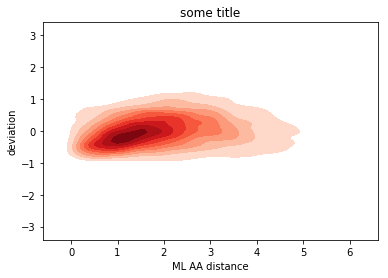

In [53]:
import seaborn as sns
ax = sns.kdeplot(ML_dists, deviations,
cmap="Reds", shade=True, shade_lowest=False)
ax.set(xlabel='ML AA distance', ylabel='deviation', title='some title')


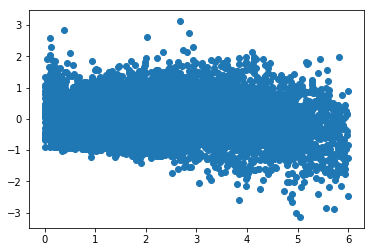

In [45]:
plt.scatter(ML_dists, deviations)

[Text(0, 0.5, 'deviation'), Text(0.5, 0, 'rmsd'), Text(0.5, 1.0, 'some title')]

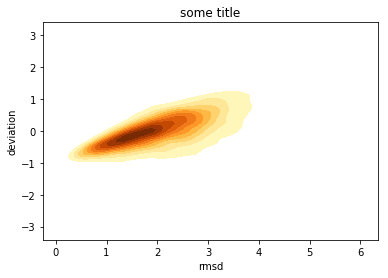

In [52]:
ax = sns.kdeplot(rmsd_dists, deviations,
cmap="YlOrBr", shade=True, shade_lowest=False)
ax.set(xlabel='rmsd', ylabel='deviation', title='some title')

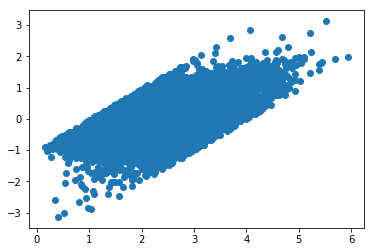

In [46]:
plt.scatter(rmsd_dists, deviations)

(array([ 47.,  43., 135., 142., 128., 133., 144., 143., 166., 178., 191.,
        198., 232., 229., 242., 257., 231., 283., 265., 281., 263., 245.,
        274., 273., 257., 277., 255., 260., 253., 282., 250., 252., 240.,
        262., 234., 249., 244., 241., 207., 229., 209., 192., 198., 174.,
        183., 189., 167., 144., 147., 165., 156., 181., 140., 138., 122.,
        114., 120., 116., 114., 110.,  97., 116.,  90.,  79.,  77.,  80.,
         77.,  64.,  71.,  64.,  75.,  57.,  73.,  54.,  61.,  65.,  42.,
         47.,  39.,  45.,  43.,  41.,  51.,  37.,  31.,  32.,  24.,  38.,
         27.,  21.,  32.,  21.,  23.,  35.,  22.,  12.,  27.,  22.,  23.,
         13.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.

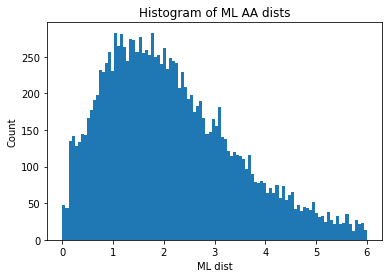

In [42]:
plt.title('Histogram of ML AA dists')
plt.xlabel('ML dist')
plt.ylabel('Count')

plt.hist(ML_dists, bins = 100)


In [10]:
import pdb

def read_labels(tsv_file):
        '''Read tsv file format containing: uid1 \t uid2 \t ML distance \t RMSD distance
        '''

        distance_dict = {} #Save information for each uid pair
        
        with open(tsv_file) as file:
                for line in file:
                        line = line.rstrip() #Remove newlines
                        line = line.split("\t") #Split on tab
                        uid_pair = (line[0]+'_'+line[1]) #Get uid pair
                     
                        
                        ML_dist = float(line[2]) #aa evolutionary distance from tree-puzzle
                        rmsd_dist = float(line[3]) #rmsd from TMalign
                        Chain1 = int(line[4]) 
                        Chain2 = int(line[5])
                        Aligned = int(line[6])/min(Chain1, Chain2)
                        Identity = float(line[7])
                        

                        distance_dict[uid_pair] = [ML_dist, rmsd_dist, Chain1, Chain2, Aligned, Identity]
                        
                                

        return(distance_dict)
    
(distance_dict) = read_labels('/home/pbryant/results/CATH/20190430/all_dist_rmsd.tsv')

def get_locations(encode_locations):
        '''Get all file locations for encodings
        '''

        locations = []
        with open(encode_locations) as file:
                for line in file:
                        line = line.rstrip()
                        locations.append(line)
                       



        return locations

#Get file locations
locations = get_locations('/home/pbryant/results/CATH/20190430/encoding_locations.txt')

#Save H-groups
H_groups = {} 

for file_name in locations:
  
  file_name = file_name.split('/')
  H_group = file_name[-2]
  uid_pair = file_name[-1].split('.')[0]

  H_groups[uid_pair] = H_group



                              
#Match H-group to rmsd and ML aa dist
uids = [] #save uids
H_group_list = []
rmsd_dists = []
ML_dists = []   
                              
for key in locations:
    key = key.split('/')[-1].split('.')[0]
    [ML_dist, rmsd_dist, Chain1, Chain2, Aligned, Identity] = distance_dict[key]
    
    if ML_dist <= 6:
        uids.append(key)
        rmsd_dists.append(rmsd_dist)
        ML_dists.append(ML_dist)
        H_group_list.append(H_groups[key])


In [12]:
print(len(H_group_list), len(rmsd_dists))


13488 13488


In [70]:
#Get deviations from line of best fit
from scipy import stats
deviations = [] #Save deviations
#Calculate line of best fit
(slope, intercept, r_value, p_value, std_err) = stats.linregress(ML_dists, rmsd_dists)
for i in range(0, len(ML_dists)):
    deviation = rmsd_dists[i]-(intercept+slope*ML_dists[i])
    deviations.append(deviation)
    
#Group deviations and uids by H-group
deviation_dict = {} #Save devitaions by H-group
uids_by_group = {} #Save uids by H-group

for i in range(0, len(H_group_list)):
    if H_group_list[i] in deviation_dict.keys():
        deviation_dict[H_group_list[i]].append(deviations[i])
        uids_by_group[H_group_list[i]].append(uids[i]) 
    else:
        deviation_dict[H_group_list[i]] = [deviations[i]]
        uids_by_group[H_group_list[i]] = [uids[i]]
        
    
    


In [71]:
averages = []
abs_averages = []
unique_groups = []
for key in deviation_dict:
    unique_groups.append(key)
    averages.append(sum(deviation_dict[key])/len(deviation_dict[key]))
    
    abs_averages.append(sum([abs(x) for x in deviation_dict[key]])/len(deviation_dict[key]))
    



In [73]:
len(uids_by_group.keys())

2442

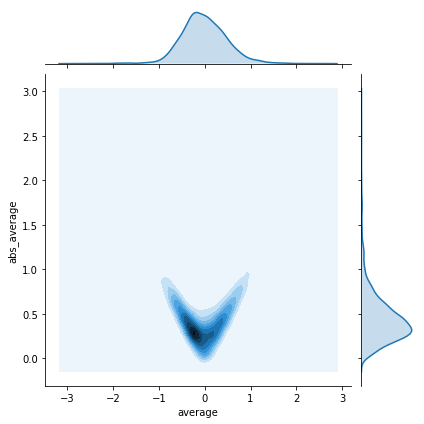

In [152]:
import seaborn as sns
import pandas as pd 
df = pd.DataFrame(list(zip(averages, abs_averages)), 
               columns =['average', 'abs_average']) 
df
sns.jointplot(x="average", y="abs_average", data=df, kind="kde")

In [96]:
#Group by C.A
ca_av_dict = {}
ca_av_abs_dict = {}
for i in range(0, len(unique_groups)):
    CA = unique_groups[i].split('.')[0:2] 
    CA = CA[0]+'.'+CA[1]
    
    if CA in ca_av_dict.keys():
        ca_av_dict[CA].append(averages[i])
        ca_av_abs_dict[CA].append(abs_averages[i])
    else:
        ca_av_dict[CA] = [averages[i]]
        ca_av_abs_dict[CA] = [abs_averages[i]]
    



In [128]:
lst1 = [*ca_av_dict.keys()]
lst2 =[*ca_av_dict.values()]


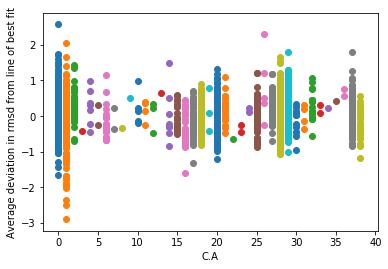

In [135]:
x = []
y = []
c = -1
plt.xlabel('C.A')
plt.ylabel('Average deviation in rmsd from line of best fit')
for item in lst2:
    c+=1
    index = np.zeros(len(item))
    index[0:] += c
    [x.append(i) for i in index]
    [y.append(j) for j in item]
    plt.scatter(index,item)
    
    

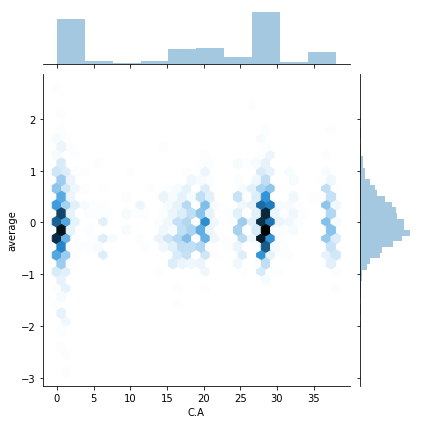

In [147]:
df = pd.DataFrame(list(zip(x, y)), 
               columns =['C.A', 'average']) 

sns.jointplot(x="C.A", y="average", data=df, kind = "hex")

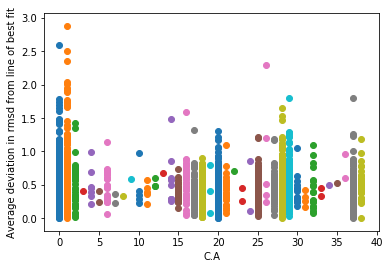

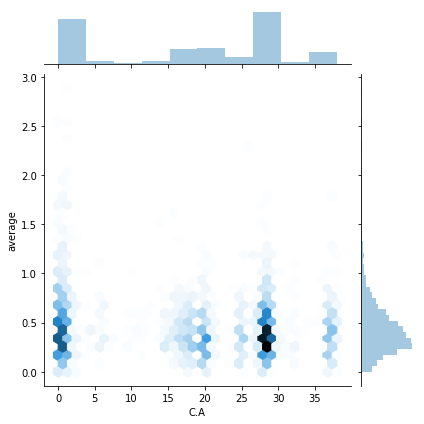

In [156]:
lst1 = [*ca_av_abs_dict.keys()]
lst2 =[*ca_av_abs_dict.values()]
x = []
y = []
c = -1
plt.xlabel('C.A')
plt.ylabel('Average deviation in rmsd from line of best fit')
for item in lst2:
    c+=1
    index = np.zeros(len(item))
    index[0:] += c
    [x.append(i) for i in index]
    [y.append(j) for j in item]
    plt.scatter(index,item)#/home/pbryant/data/CATH/cath-domain-seqs-S95.fa
df = pd.DataFrame(list(zip(x, y)), 
               columns =['C.A', 'average']) 

sns.jointplot(x="C.A", y="average", data=df, kind = "hex")